In [22]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
from re import X
import matplotlib.pyplot as plt



train_data = datasets.MNIST(
    root= 'data',
    train= True,
    transform= ToTensor(),
    download= True
)
test_data = datasets.MNIST(
    root= 'data',
    train= False,
    transform= ToTensor(),
    download= True
)




In [23]:
loaders = {
    'train' : DataLoader(train_data,batch_size=100,shuffle=True,num_workers=1)
   ,'test' : DataLoader(test_data,batch_size=100,shuffle=True,num_workers=1)
}
loaders

class CNN(nn.Module):
    def __init__(self):
        super(CNN , self).__init__()
        self.conv1 = nn.Conv2d(1,10,kernel_size=5)
        self.conv2 = nn.Conv2d(10,20,kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)
    def forward (self , x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x = x.view(-1,320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x,training=self.training)
        return F.softmax(x)

device = torch. device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr= 0.001)
loss_fn = nn.CrossEntropyLoss()
def train(epoch):
    model.train()
    for batch_idx , (data , target) in enumerate(loaders['train']):
        data , target = data.to(device) , target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output , target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
           print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\tLoss: {loss.item():0.6f}')

def test ():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data , target in loaders['test']:
            data , target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output,target).item()
            pred = output.argmax(dim=1,keepdim = True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len (loaders['test'].dataset)
    print(f'\nTest set : Average loss ; {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset): .0f}%\n)')
for epoch in range (1,11):
    print(train(epoch))
    print(test())



<ipython-input-23-feb29fa83924>:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 3.912537
Train Epoch: 1 [2000/60000 (3%)]	Loss: 3.879180
Train Epoch: 1 [4000/60000 (7%)]	Loss: 3.778490
Train Epoch: 1 [6000/60000 (10%)]	Loss: 3.781435
Train Epoch: 1 [8000/60000 (13%)]	Loss: 3.727204
Train Epoch: 1 [10000/60000 (17%)]	Loss: 3.765816
Train Epoch: 1 [12000/60000 (20%)]	Loss: 3.771177


KeyboardInterrupt: 

Prediction: 6


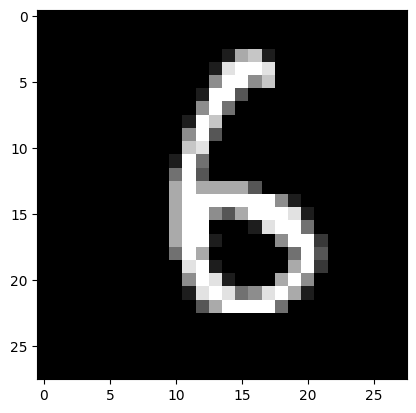

In [19]:
model.eval()
data, target = test_data[3000]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim=1, keepdim=True).item()
print(f'Prediction: {prediction}')
image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, cmap='gray')
plt.show()